In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyQt6 import QtWidgets

plt.rcParams["backend"] = 'QtAgg'
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 250
plt.rcParams["savefig.format"] = "svg"
plt.rcParams['animation.frame_format'] = "svg"
plt.rcParams['font.family'] = 'serif'

import sys
import os
wd = %pwd
parent = os.path.dirname(wd)
fdel = os.path.sep

sys.path.append(parent)

import nanoscale_measurement as nano

In [1]:
def qt_load_file_dialog(dialog_title: str = "Choose a file", initial_dir: str = wd,
                        file_types: str = "All Files (*);;Text Files (*.txt);;Excel Files (*.xlsx);;csv Files (*.csv)",):

    app = QtWidgets.QApplication.instance()  # Check if an instance already exists

    if not app:  # If not, create a new instance
        app = QtWidgets.QApplication(sys.argv)

    file_path, _ = QtWidgets.QFileDialog.getOpenFileName(None, dialog_title, initial_dir, file_types, options=QtWidgets.QFileDialog.Option.DontUseNativeDialog)

    return file_path

def profilometry_plot(data: pd.Series, **kwargs):
    fig, ax = plt.subplots(1, 1)
    ax.plot(data)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.grid(visible=True, which='both', axis='both', ls = ":", lw = 0.75)
    # Increase the number of ticks on x and y axes
    ax.minorticks_on()
    ax.set_xlabel("x (mm)")
    ax.set_ylabel("Height (nm)")
    ax.set_title("Profilometry data")
    # ax.xaxis.set_major_locator(MaxNLocator(nbins=19))
    # ax.yaxis.set_major_locator(MaxNLocator(nbins=19))
    return fig, ax   


def find_closest_index(series: pd.Series, target_index_value: float) -> tuple:
    # Subtract the target value from the series and take the absolute value
    diff = abs((series.index - target_index_value))
    # Find the index of the minimum value in the resulting series
    closest_iloc = diff.argmin()
    # Find the iloc position of the closest index
    closest_index_value = series.index[closest_iloc]
    return closest_index_value, closest_iloc

def fit_line(x1: tuple , x2: tuple):  # x1 and x2 should be tuples returned by the get_closest_index function.
    x = data.index[x1[1]:x2[1]]
    y = data[x]
    vals = np.polyfit(x, y, 1)
    fit = np.polyval(vals, data.index)
    return vals, fit

filepath = None
# Load the data
if filepath is not None:
    filepath = qt_load_file_dialog()
else:
    filepath = qt_load_file_dialog()

def separate_header(data: pd.Series):
    for i in range(len(data)):
        if data.index[i].isnumeric():
            end_header = i - 1
        else:
            continue
    header = data[0:end_header]
    data = data[end_header::]
    return header, data
    

raw_data = pd.read_csv(filepath, index_col=0)
header_row = separate_header(filepath)
data = pd.read_csv(filepath, index_col=0, header=header_row)

header = pd.Series(data[data.columns[0]][0:22])
data = pd.Series(data[data.columns[1]][22::].astype(float).to_list(), index = data[data.columns[0]][22::].astype(float), name = "Profile (nm)")
#data = data[::-1]
data.index.rename('x', inplace=True)
fig, ax = profilometry_plot(data)

plt.show()

ModuleNotFoundError: No module named 'Qt6'

(0.5, 4501) (0.900022217, 8102)


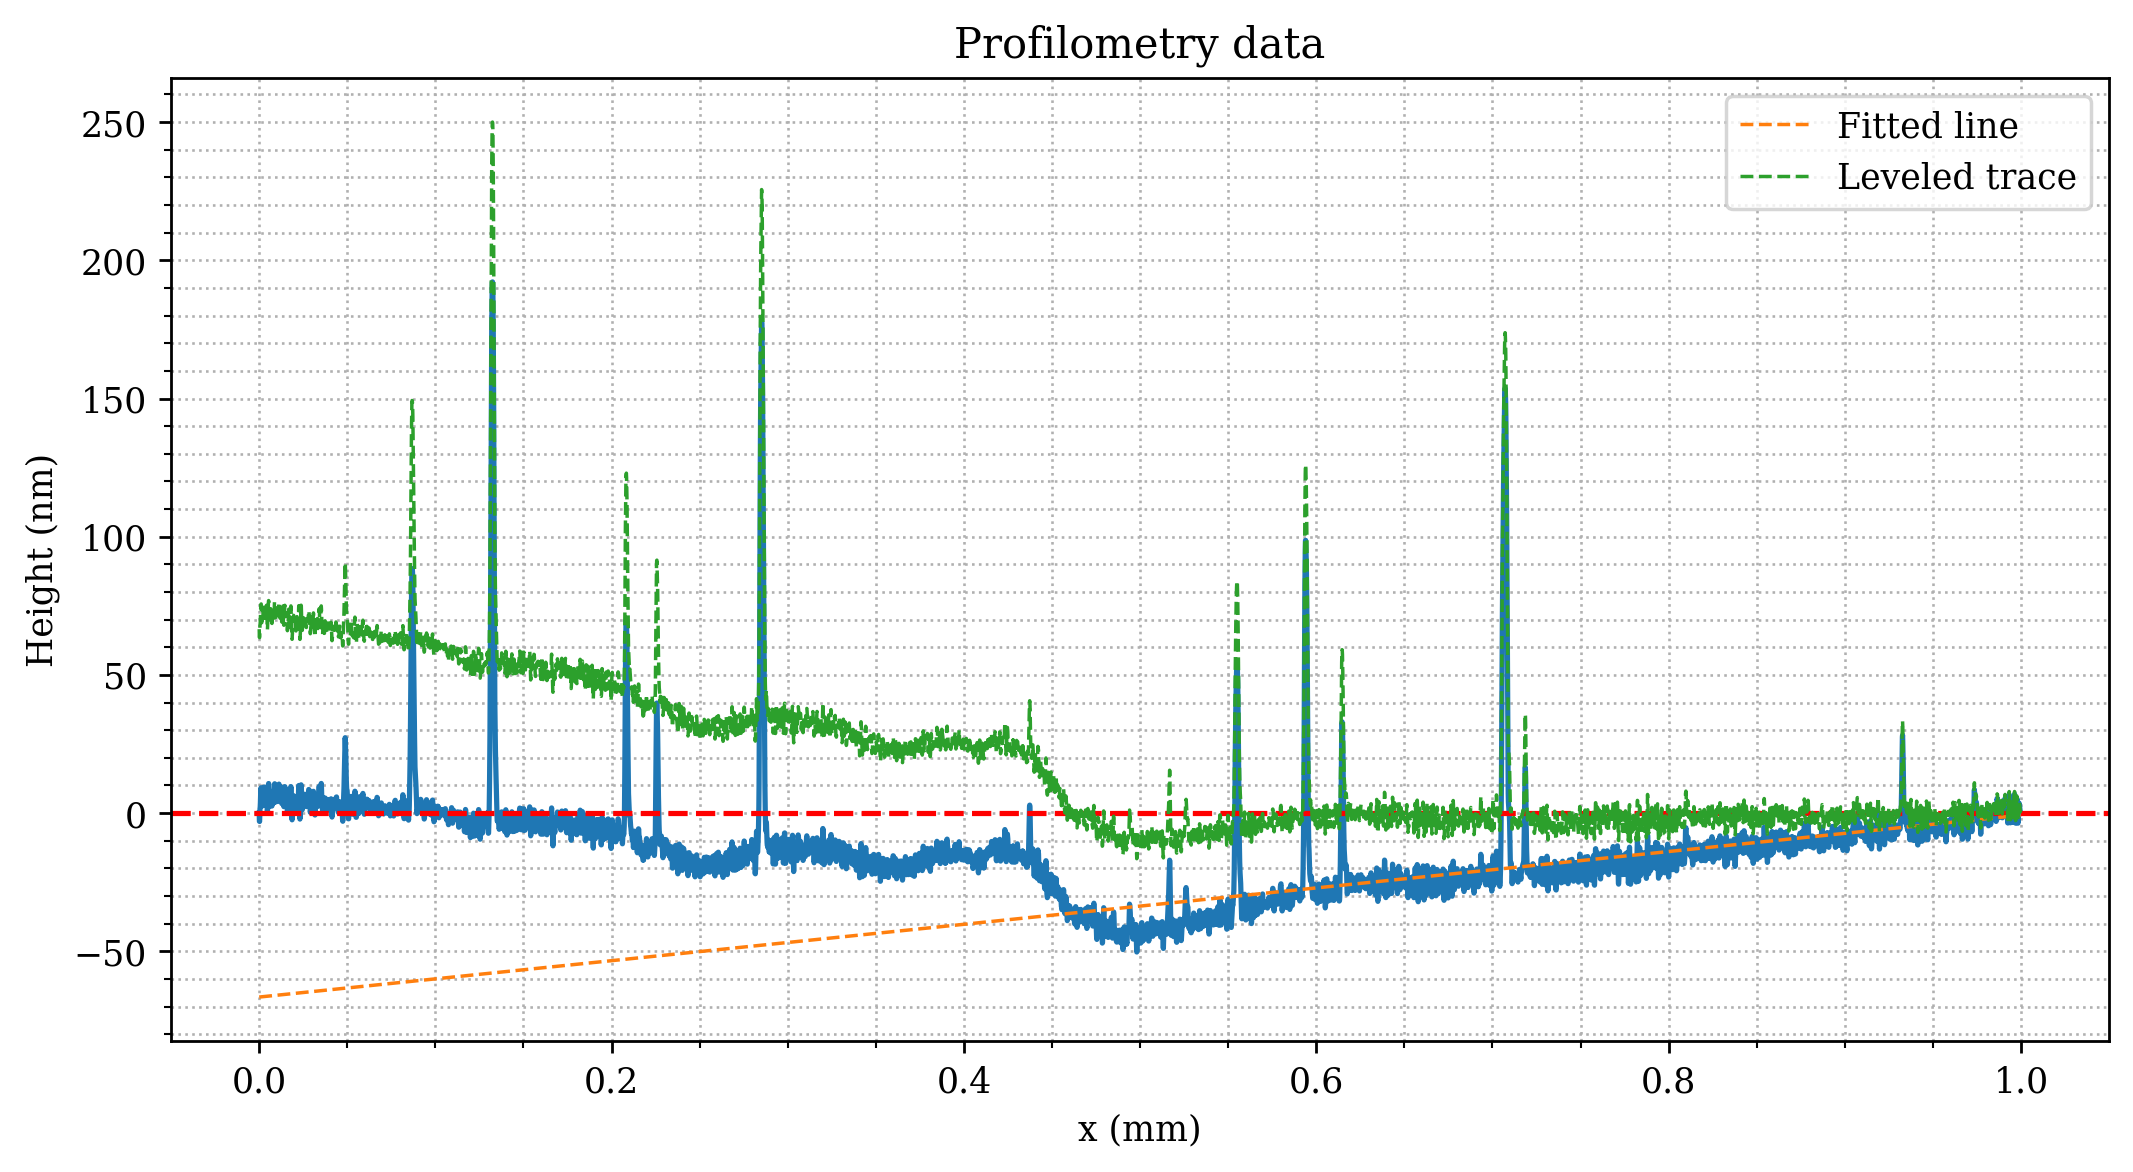

In [4]:
# Example usage
# Function to fit a line between two points
def fit_line(x1: tuple , x2: tuple):  # x1 and x2 should be tuples returned by the get_closest_index function.
    x = data.index[x1[1]:x2[1]]
    y = data[x]
    vals = np.polyfit(x, y, 1)
    fit = np.polyval(vals, data.index)
    return vals, fit

# # Function to level the data
# def level_data(data: pd.Series, x1, x2):
#     y1 = data.loc[data == x1, 'height'].values[0]
#     y2 = data.loc[data == x2, 'height'].values[0]
#     slope, intercept = fit_line(x1, y1, x2, y2)
    
#     # Adjust the height values
#     data['leveled_height'] = data['height'] - (slope * data['x'] + intercept)
#     return data


# Define x1 and x2 as the x values on your chart between which you want to fit a straight line to be used for
# data leveling..

x1, x2 = 0.5, 0.9
ex1, ex2 = find_closest_index(data, x1), find_closest_index(data, x2) # Gets the index positions closest to x1, x2
print(ex1, ex2)
index = data.index[ex1[1]:ex2[1]]

#Assuming the data has columns 'x' and 'height'
fitted = fit_line(ex1, ex2)
leveled = data - fitted[1]

# Plot the original and leveled data
fig, ax = profilometry_plot(data)
ax.plot(data.index, fitted[1], label='Fitted line', lw = 1, ls = "--")
ax.plot(leveled, label='Leveled trace', lw = 1, ls = "--")

plt.legend()
plt.show()